## Grover's algorithm with the CZ-gate model on a 3-qubits space

Grover search for states |101> and |110>

Import required packages and initialize the least busy backend

In [1]:
from math import pi
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))

Initialise a uniform superposition

In [2]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc


N-qubit diffuser

In [4]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # |s> -> |00..0>
    for qubit in range(nqubits):
        qc.h(qubit)
    # |00..0> -> |11..1>
    for qubit in range(nqubits):
        qc.x(qubit)
        
    # multi-controlled Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1) 
    qc.h(nqubits-1)

    # |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s


Creation of our Grover circuit

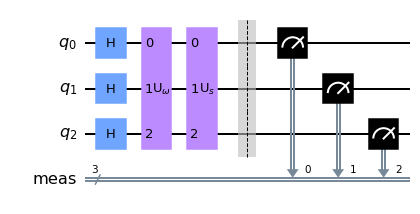

In [6]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"
grover_circuit.append(oracle_ex3, [0,1,2])
grover_circuit.append(diffuser(n), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw(output="mpl")

Simulation of the circuit

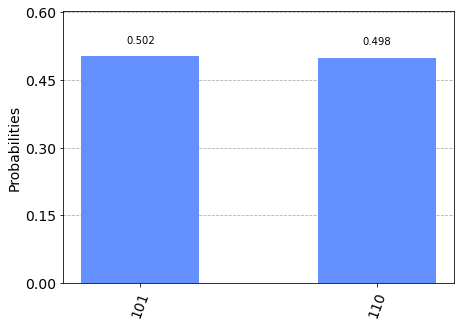

In [7]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

Visualization of the circuit

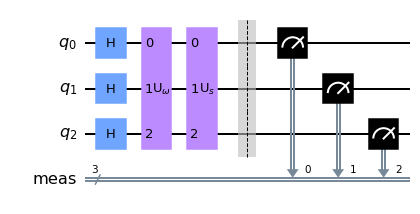

In [9]:
grover_circuit.draw(output="mpl")

Processing of the circuit on quantum hardware

Job Status: job has successfully run


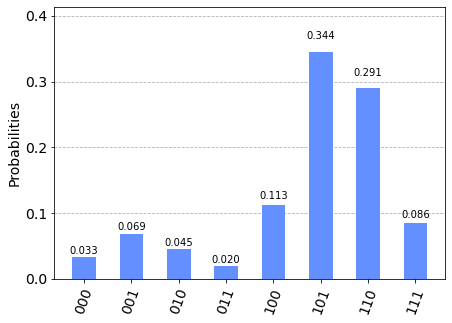

In [10]:
# Run on the least busy backend
transpiled_grover_circuit = transpile(grover_circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

Implementation of an error in the Grover circuit

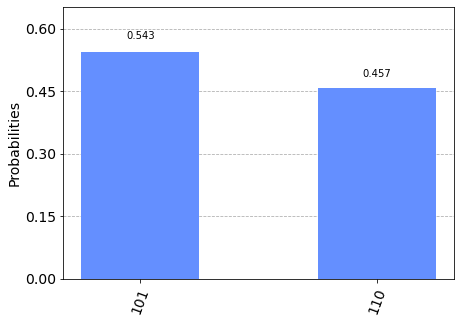

In [11]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
qc = QuantumCircuit(3)
qc.cz(0, 2)
qc.cz(1, 2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"
grover_circuit.append(oracle_ex3, [0,1,2])

# error after the oracle
qc.rx(pi/4, 0)
grover_circuit.append(diffuser(n), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw()

aer_sim = Aer.get_backend('aer_simulator')
transpiled_grover_circuit = transpile(grover_circuit, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)